In [ ]:
# Load some test data
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Fix missing values
mpg = mpg.dropna()
mpg.loc[mpg['horsepower']=="?",'horsepower'] = 0
mpg.horsepower = pd.to_numeric(mpg.horsepower)
# Encode our features and target as needed



X = mpg.drop(columns=["origin","name"])
y = mpg.origin

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
# After you get a model to work, you should tune it: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train),clf.score(X_test, y_test))
# Test it 


# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.802158273381295 0.8083333333333333


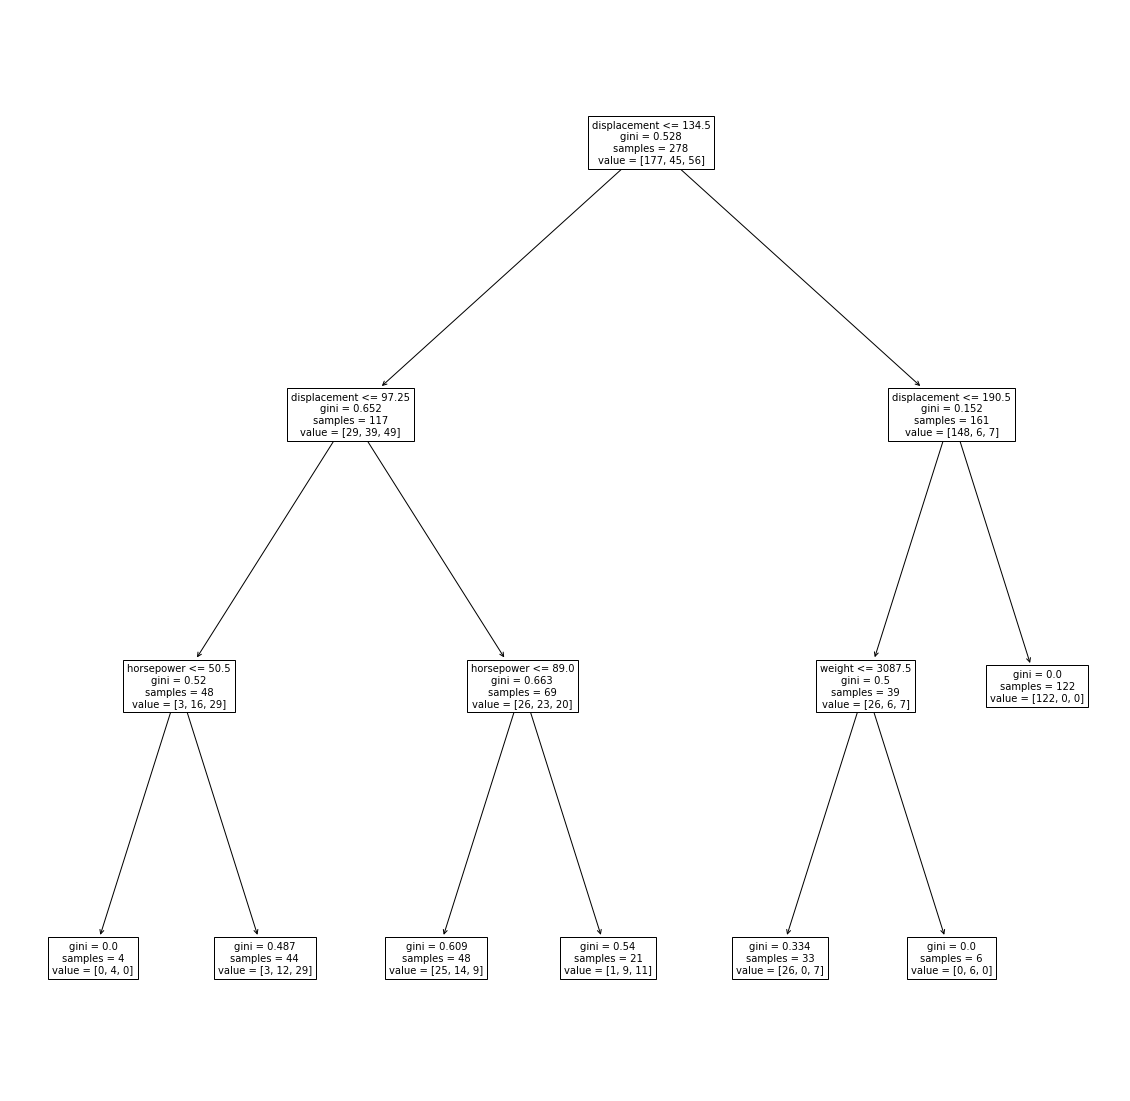

In [ ]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()